In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

In [5]:

def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

Saving image to: image_processed/moon_filtered.png


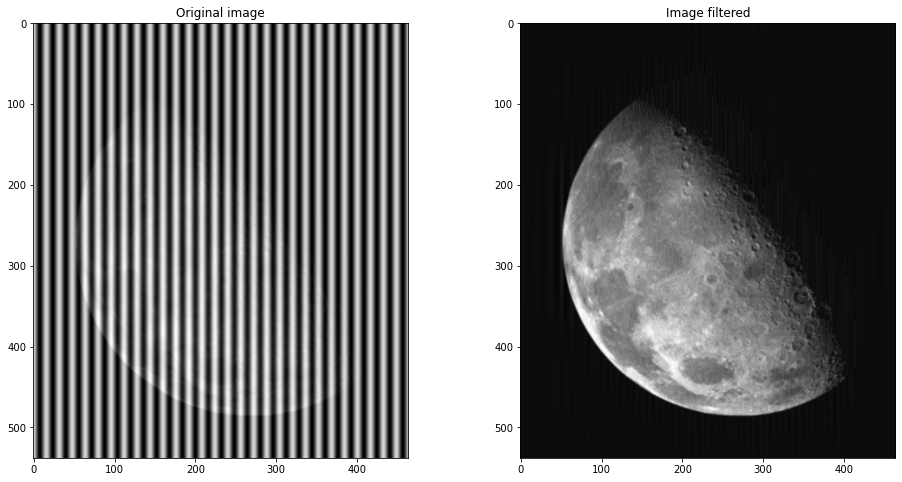

In [12]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    
    """
    
    # Since the spikes are on a simple horizontal line in the center around [265:275], we
    # can simply craete a kernel which removes theese values. Non-shifted, [265:275] becomes [0:10]
    # Note that the middle area should be unaffected.
    kernel = np.ones(im.shape)
    spike_height = 4  # Lines are barely visible at < 4
    image_center_x = im.shape[1] // 2
    image_center_y = im.shape[0] // 2
    center_width = 28  # Lines are visible for > 28

    kernel[image_center_y - spike_height //
           2:image_center_y + spike_height // 2] = 0
    kernel[image_center_y - spike_height // 2:image_center_y + spike_height //
           2, image_center_x - center_width:image_center_x + center_width] = 1

    # plt.figure(figsize=(8, 8))
    # plt.imshow(kernel)
    # plt.show()

    # For simplicity, we create the kernel first, then use it. Thus, we have to shift it before multiplication
    kernel = np.fft.fftshift(kernel)

    fft_im = np.fft.fft2(im)

    # Note that this is not matrix multiplication, only point-vise multiplication
    # For matrix multiplication, use np.matmul(..)
    fft_im_filtered = fft_im * kernel

    inversed_im = np.fft.ifft2(fft_im_filtered).real

    # Visualization start, don't calculate from here
    fft_im = np.fft.fftshift(fft_im)
    fft_im = magnitude(fft_im)
    fft_im = np.log(fft_im + 1)

    fft_im_filtered = np.fft.fftshift(fft_im_filtered)
    fft_im_filtered = magnitude(fft_im_filtered)
    fft_im_filtered = np.log(fft_im_filtered + 1)

    kernel = np.fft.fftshift(kernel)

    plt.figure(figsize=(16, 8))
    plt_rows = 5

    plt.subplot(1, plt_rows, 1)
    plt.imshow(im, cmap="gray")
    plt.title("Original image")

    plt.subplot(1, plt_rows, 2)
    plt.imshow(fft_im, cmap="gray")
    plt.title("FFT image shifted")

    plt.subplot(1, plt_rows, 3)
    plt.imshow(kernel, cmap="gray")
    plt.title("Kernel")

    plt.subplot(1, plt_rows, 4)
    plt.imshow(fft_im_filtered, cmap="gray")
    plt.title("FFT image filtered")

    plt.subplot(1, plt_rows, 5)
    plt.imshow(inversed_im, cmap="gray")
    plt.title("Inversed image")

    plt.savefig(utils.image_output_dir.joinpath("task4c_full.png"))
    # plt.show()
    """

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    kernel = np.ones(im.shape)
    spike_height = 4  # Lines are barely visible at < 4
    image_center_x = im.shape[1] // 2
    image_center_y = im.shape[0] // 2
    center_width = 28  # Lines are visible for > 28

    kernel[image_center_y - spike_height //
           2:image_center_y + spike_height // 2] = 0
    kernel[image_center_y - spike_height // 2:image_center_y + spike_height //
           2, image_center_x - center_width:image_center_x + center_width] = 1
    
    kernel = np.fft.fftshift(kernel)

    fft_im = np.fft.fft2(im)
    
    fft_im_filtered = fft_im * kernel

    im_filtered = np.fft.ifft2(fft_im_filtered).real
    

    plt.figure(figsize=(16, 8))
    plt_rows = 2

    plt.subplot(1, plt_rows, 1)
    plt.imshow(im, cmap="gray")
    plt.title("Original image")

    plt.subplot(1, plt_rows, 2)
    plt.imshow(im_filtered, cmap="gray")
    plt.title("Image filtered")
    


    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))